In [1]:
#importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import catboost 
from catboost import CatBoostClassifier
%matplotlib inline

In [2]:
#Importing the DataSet
df_train = pd.read_csv(r'C:\Users\pc\Downloads\Titanic-train (1).csv')
df_test = pd.read_csv(r'C:\Users\pc\Downloads\Titanic_test (1).csv')

In [3]:
#Checking out for the first five Columns
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#Check out the vital information of the data set to know the category of each rows or columms
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Concatenating the dataset
data = pd.concat([df_train, df_test], sort=False, ignore_index=True)

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
len(data)

1309

In [11]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,True,False,False,False,True,False,False,False,False,True,False
1305,False,True,False,False,False,False,False,False,False,False,False,False
1306,False,True,False,False,False,False,False,False,False,False,True,False
1307,False,True,False,False,False,True,False,False,False,False,True,False


In [12]:
data.apply(lambda col: col.drop_duplicates().reset_index(drop=True))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0.0,1.0,PC 17599,71.2833,C85,C
2,3,NaN,2.0,"Heikkinen, Miss. Laina",NaN,26.0,3.0,2.0,STON/O2. 3101282,7.9250,C123,Q
3,4,NaN,NaN,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.0,4.0,5.0,113803,53.1000,E46,NaN
4,5,NaN,NaN,"Allen, Mr. William Henry",NaN,NaN,2.0,3.0,373450,8.0500,G6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,NaN,"Saether, Mr. Simon Sivertsen",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1305,1306,NaN,NaN,"Ware, Mr. Frederick",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1306,1307,NaN,NaN,"Peter, Master. Michael J",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1307,1308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Filling the missing numbers with an outlier(-999999)

data.fillna(-99, inplace=True, axis=1)
data.drop('Name', inplace=True, axis=1)

In [14]:
#Change the objects to a categorical data 
data[['Sex','Ticket','Cabin','Embarked']] =data[['Sex','Ticket','Cabin','Embarked']].astype('category')

In [15]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,-99,S
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,-99,S
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,male,35.0,0,0,373450,8.0500,-99,S


In [16]:
def handle_non_numeric_data(data):
    columns = data.columns.values
    for column in columns:
        text_digit_vals ={}
        
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if data[column].dtype != np.int64 and data[column].dtype != np.float64:
            column_contents = data[column].values.tolist()
            unique_elements = set(column_contents)
            x=0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            data[column] = list(map(convert_to_int, data[column]))
            
    return data

data = handle_non_numeric_data(data)

data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,0,22.0,1,0,45,7.2500,146,3
1,2,1.0,1,1,38.0,1,0,238,71.2833,124,2
2,3,1.0,3,1,26.0,0,0,863,7.9250,146,3
3,4,1.0,1,1,35.0,1,0,294,53.1000,25,3
4,5,0.0,3,0,35.0,0,0,707,8.0500,146,3


(-104.01669426048565, 6.016694260485652)

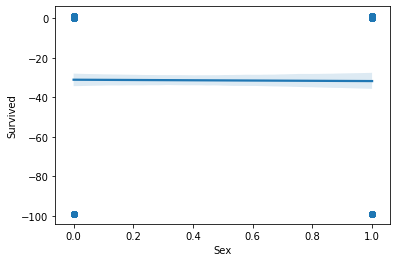

In [17]:
sns.regplot(x='Sex', y='Survived', data=data)
plt.ylim()
#This shows that there's fair correlation between the two features
#In other words, Survival has litle or nothing to dowith the Gender involved

In [18]:
#Scaling Some of the columns
StandardScaler = StandardScaler()
columns_to_scale = (['Age',
                    'Ticket',
                    'Fare',
                    'Cabin'])
data[columns_to_scale ] = StandardScaler.fit_transform(data[columns_to_scale])

In [19]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,0,0.338452,1,0,-1.566079,-0.500393,0.365361,3
1,2,1.0,1,1,0.639077,1,0,-0.843466,0.734624,-0.273283,2
2,3,1.0,3,1,0.413608,0,0,1.496603,-0.487374,0.365361,3
3,4,1.0,1,1,0.582710,1,0,-0.633796,0.383921,-3.147183,3
4,5,0.0,3,0,0.582710,0,0,0.912522,-0.484963,0.365361,3


In [20]:
target = data.pop('Survived')
len_train = len(df_train)

In [21]:
X =data.iloc[:len_train]
test = data.iloc[len_train:].copy()
y = target[:len_train]

In [22]:
#Import your train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [23]:
CLF = CatBoostClassifier()

In [24]:
CLF.fit(X_train, y_train)

Learning rate set to 0.008911
0:	learn: 0.6887659	total: 173ms	remaining: 2m 53s
1:	learn: 0.6835799	total: 185ms	remaining: 1m 32s
2:	learn: 0.6784171	total: 189ms	remaining: 1m 2s
3:	learn: 0.6737317	total: 194ms	remaining: 48.2s
4:	learn: 0.6693406	total: 196ms	remaining: 39s
5:	learn: 0.6635797	total: 200ms	remaining: 33.2s
6:	learn: 0.6605915	total: 203ms	remaining: 28.8s
7:	learn: 0.6561383	total: 208ms	remaining: 25.8s
8:	learn: 0.6522958	total: 211ms	remaining: 23.3s
9:	learn: 0.6480764	total: 214ms	remaining: 21.2s
10:	learn: 0.6437898	total: 216ms	remaining: 19.4s
11:	learn: 0.6388744	total: 218ms	remaining: 17.9s
12:	learn: 0.6343755	total: 221ms	remaining: 16.7s
13:	learn: 0.6301709	total: 223ms	remaining: 15.7s
14:	learn: 0.6260026	total: 225ms	remaining: 14.8s
15:	learn: 0.6229494	total: 227ms	remaining: 13.9s
16:	learn: 0.6191621	total: 228ms	remaining: 13.2s
17:	learn: 0.6154282	total: 230ms	remaining: 12.6s
18:	learn: 0.6113073	total: 232ms	remaining: 12s
19:	learn: 0.

In [25]:
yhat_positive = CLF.predict_proba(X_test)[:,1]

In [26]:
CLF.predict_proba(X_test).round()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [27]:
roc_auc_score(y_test,yhat_positive)

0.8951251646903822